In [3]:
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet, stopwords
import string
import nltk

# Ensure the necessary NLTK datasets are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')  # Add this line to download the omw-1.4 resource

# Data loading train data 
file_path = r"C:\Users\ABHILAKSH\Downloads\0000000000002747_training_twitter_x_y_train.csv"

# Load the CSV file
data = pd.read_csv(file_path, delimiter=",")
data
#print(data)

# Extracting features and labels
X_train = data.text
Y_train = np.array(data.airline_sentiment)
print(Y_train.shape, X_train.shape)

#DATA Cleaning
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get simplified POS tag
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Preparing stop words and punctuations #STOPWORDS REMOVING
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)

# Data cleaning
def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])[0][1]  # Getting POS tag for the word
            clean_word = lemmatizer.lemmatize(w, pos=get_simple_pos(pos))
            output_words.append(clean_word.lower())
    return " ".join(output_words)

 # function to split the text into individual word
from nltk.tokenize import word_tokenize

# Apply the clean_review function to each entry in X_train
X_train = [clean_review(word_tokenize(i)) for i in X_train] #MAIN

# Display the processed data
#print(X_train[:5])# Display the first 5 processed entries for verification

#loading test data 
file_path_test = r"C:\Users\ABHILAKSH\Downloads\0000000000002747_test_twitter_x_test.csv"
data_test = pd.read_csv(file_path_test, delimiter=",")

# Extract the test features
X_test = np.array(data_test.text)

# Display the test data
#print(X_test)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABHILAKSH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ABHILAKSH\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ABHILAKSH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABHILAKSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ABHILAKSH\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(10980,) (10980,)


In [4]:
data

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...
10975,569934458364813313,neutral,American,NaN,Cottopanama85,NaN,0,@AmericanAir followback,NaN,2015-02-23 10:58:58 -0800,"ohio,panama",NaN
10976,568564006329434113,positive,United,NaN,PaulBEsteves,NaN,0,@united thanks for the help. Wish the phone re...,NaN,2015-02-19 16:13:17 -0800,Brooklyn,Eastern Time (US & Canada)
10977,569643648910028801,negative,US Airways,NaN,runfixsteve,NaN,0,@usairways the. Worst. Ever. #dca #customerser...,NaN,2015-02-22 15:43:24 -0800,"St. Augustine, Florida",NaN
10978,568864981917110272,negative,US Airways,NaN,CLChicosky,NaN,0,@nrhodes85: look! Another apology. DO NOT FLY ...,NaN,2015-02-20 12:09:15 -0800,NaN,NaN


In [26]:
X_test = [ clean_review(word_tokenize(i)) for i in X_test]

#Count Vectoeizer data of array of tuple into data that sklearn requeird
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(max_features = 10025 , ngram_range=(1,3)) 
# fit the training data into count vectorizer model 
X_train_features = count_vec.fit_transform(X_train) #MAIN
X_test_features = count_vec.transform(X_test) #Main 
# convert the sparse martix into dense martix
x_test = X_test_features.todense()
x_train = X_train_features.todense()

# CLASSIFIER 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier

clf = MultinomialNB() 
clf.fit(X_train_features , Y_train)
Y_pred = clf.predict(X_test_features)
print(Y_pred)



['negative' 'negative' 'negative' ... 'neutral' 'positive' 'neutral']


In [22]:
#  to get the test data text and yprediction 
result_df = pd.DataFrame({
    'Text': data_test.text,  # Use the original text data for readability
    'Predicted Sentiment': Y_pred
})

# Display the results
print(result_df)

                                                   Text Predicted Sentiment
0     @AmericanAir In car gng to DFW. Pulled over 1h...            negative
1     @AmericanAir after all, the plane didn’t land ...            negative
2     @SouthwestAir can't believe how many paying cu...            negative
3     @USAirways I can legitimately say that I would...            negative
4     @AmericanAir still no response from AA. great ...            positive
...                                                 ...                 ...
3655  @USAirways Been stuck for 40+ minutes due to l...            negative
3656  @USAirways 4 hours... 4 hours... FOUR HOURS.  ...            negative
3657  Nice RT @VirginAmerica: The man of steel might...             neutral
3658  @AmericanAir Aww Thanks AA..DFW was on GMA up ...            positive
3659  @united the lounge tells us they have no pillo...             neutral

[3660 rows x 2 columns]


                                                   Text Predicted Sentiment
0     @AmericanAir In car gng to DFW. Pulled over 1h...            negative
1     @AmericanAir after all, the plane didn’t land ...            negative
2     @SouthwestAir can't believe how many paying cu...            negative
3     @USAirways I can legitimately say that I would...            negative
4     @AmericanAir still no response from AA. great ...            positive
...                                                 ...                 ...
3655  @USAirways Been stuck for 40+ minutes due to l...            negative
3656  @USAirways 4 hours... 4 hours... FOUR HOURS.  ...            negative
3657  Nice RT @VirginAmerica: The man of steel might...             neutral
3658  @AmericanAir Aww Thanks AA..DFW was on GMA up ...            positive
3659  @united the lounge tells us they have no pillo...             neutral

[3660 rows x 2 columns]


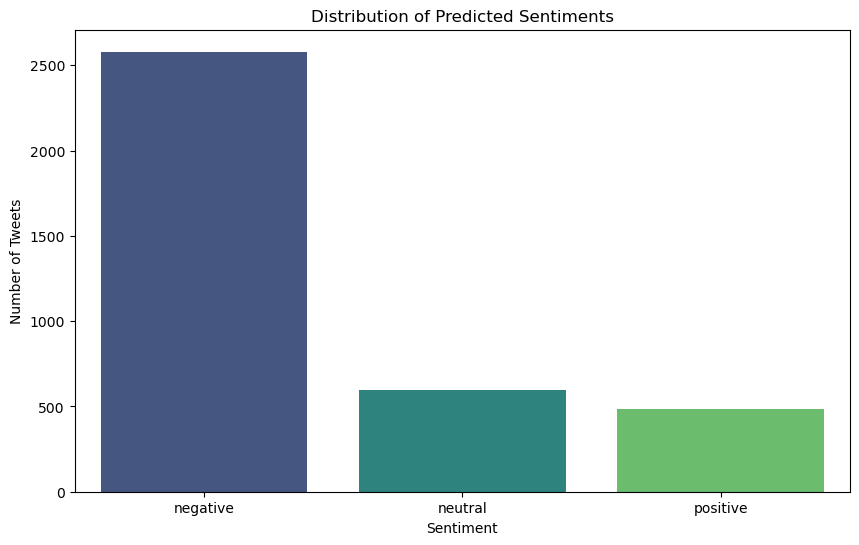

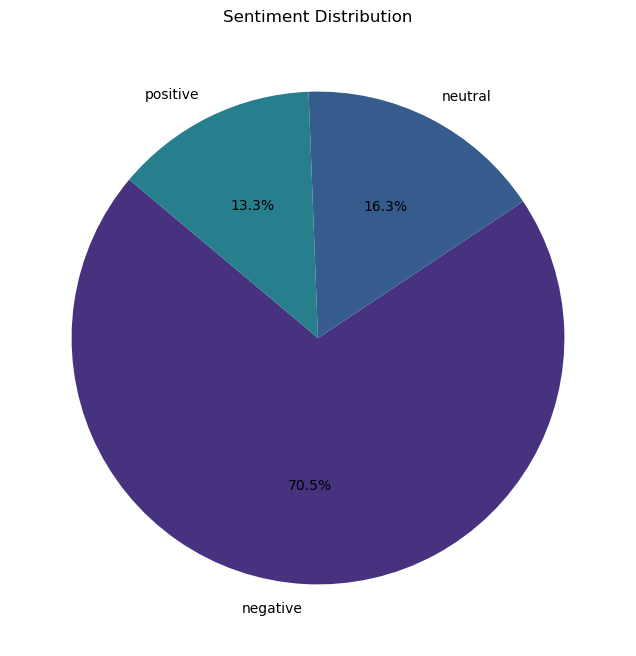

In [24]:
# Data visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming result_df is already created as mentioned
result_df = pd.DataFrame({
    'Text': data_test.text,  # Use the original text data for readability
    'Predicted Sentiment': Y_pred
})

# Display the results DataFrame
print(result_df)

# Count the number of occurrences for each sentiment
sentiment_counts = result_df['Predicted Sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Sentiment Distribution')
plt.show()


In [21]:
# save the ypred into csv file 
np.savetxt("pred.csv" , Y_pred , fmt="%s")